# Requirement

Cài thư viện

In [1]:
%pip install biosig matplotlib numpy typing nme scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Cho colab, ko chạy được do ko cài đc lib
# !pip install biosig matplotlib numpy typing nme scikit-learn
# !wget https://www.bbci.de/competition/download/competition_iv/BCICIV_2b_gdf.zip
# !unzip -q BCICIV_2b_gdf.zip -d data

# Xử lý data

In [1]:
import json
import biosig
import matplotlib.pyplot as plt
import numpy as np
import math
from typing import Literal
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mne.decoding import CSP
from wave_dataloader import MotorImageryDataset, EVENT_TYPES, Util
import torch
import torch.utils
import torch.utils.data


# Lab

In [2]:
class Model(torch.nn.Module):
    def __init__(self, label_size):
        super().__init__()
        self.fc1 = torch.nn.Linear(500 * 6, 1024)
        self.fc2 = torch.nn.Linear(1024, 256)
        self.fc3 = torch.nn.Linear(256, label_size)
        self.acf1 = torch.nn.LeakyReLU(0.5)
    def forward(self, x: torch.Tensor):
        x = x.flatten(start_dim=1)
        x = self.acf1(self.fc1(x))
        x = self.acf1(self.fc2(x))
        x = self.fc3(x)
        return x

In [3]:
def train(model: torch.nn.Module, dataloader: torch.utils.data.DataLoader , optimizer: torch.optim.Optimizer, lossf: callable):
    total_loss = 0
    total_correct = 0
    count = 0
    for batch in dataloader:
        optimizer.zero_grad()
        inputs, targets = batch
        targets = torch.tensor([label_map[id.item()] for id in targets])
        inputs: torch.Tensor = inputs.float()
        outputs = model(inputs)
        loss: torch.Tensor = lossf(outputs, targets)
        predicted = torch.argmax(outputs, dim=1)
        total_correct += (predicted == targets).sum().item()
        if torch.isnan(loss):
            print(loss.item())
        else:
            total_loss += loss.item()
            count += inputs.shape[0]
            optimizer.step()
    print(total_loss/count)
    print(total_correct/count)
model = Model(len(EVENT_TYPES))
label_map = {EVENT_TYPES[ev_key][1]: i for i, ev_key in enumerate(EVENT_TYPES)}
dataloader = Util.read_single_data("B0101T.gdf", n_workers=0, bsz=4, item_length=500)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
lossf = torch.nn.CrossEntropyLoss()
train(model, dataloader, optimizer, lossf)


nan
nan
nan
nan
nan
nan
1.007937519173873
0.05263157894736842


In [22]:
# # random marix theory
# dataloader = Util.read_data("B0101T.gdf", n_workers=0, bsz=4, item_length=16)
# full_data, full_label = [], []
# for batch in dataloader:
#     inputs, targets = batch
#     targets = torch.tensor([label_map[id.item()] for id in targets])
#     for input in inputs:
#         full_data.append(input)
#     for target in targets:
#         full_label.append(target)
# full_data = np.array(full_data, dtype=np.float64)
# full_label = np.array(full_label, dtype=np.float64)
# sample_data = np.nan_to_num(full_data, nan=0, posinf=0, neginf=0)
# csp = CSP(n_components=6, reg=None, log=True, norm_trace=False)
# lda = LinearDiscriminantAnalysis()
# data_csp = csp.fit_transform(sample_data, full_label)
# data_csp = np.nan_to_num(data_csp, nan=0, posinf=0, neginf=0)

Computing rank from data with rank=None
    Using tolerance 8.6 (2.2e-16 eps * 16 dim * 2.4e+15  max singular value)
    Estimated rank (data): 16
    data: rank 16 computed from 16 data channels with 0 projectors
Reducing data rank from 16 -> 16
Estimating class=0.0 covariance using EMPIRICAL
Done.
Estimating class=1.0 covariance using EMPIRICAL
Done.
Estimating class=2.0 covariance using EMPIRICAL
Done.
Estimating class=3.0 covariance using EMPIRICAL
Done.
Estimating class=4.0 covariance using EMPIRICAL
Done.
Estimating class=7.0 covariance using EMPIRICAL
Done.
Estimating class=9.0 covariance using EMPIRICAL
Done.
Estimating class=10.0 covariance using EMPIRICAL
Done.
Estimating class=11.0 covariance using EMPIRICAL
Done.
Estimating class=12.0 covariance using EMPIRICAL
Done.
Estimating class=13.0 covariance using EMPIRICAL
Done.


c:\Users\Anh\.conda\envs\data\Lib\site-packages\mne\decoding\csp.py:658: RuntimeWarning: invalid value encountered in sqrt
  aa += prob * np.log(np.sqrt(tmp))
c:\Users\Anh\.conda\envs\data\Lib\site-packages\mne\decoding\csp.py:245: RuntimeWarning: divide by zero encountered in log
  X = np.log(X)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(data_csp, full_label, test_size=0.2, random_state=39)
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
acurracy = accuracy_score(y_test, y_pred)
print(acurracy)

0.38181818181818183


torch.Size([4, 500, 6])
torch.Size([4])


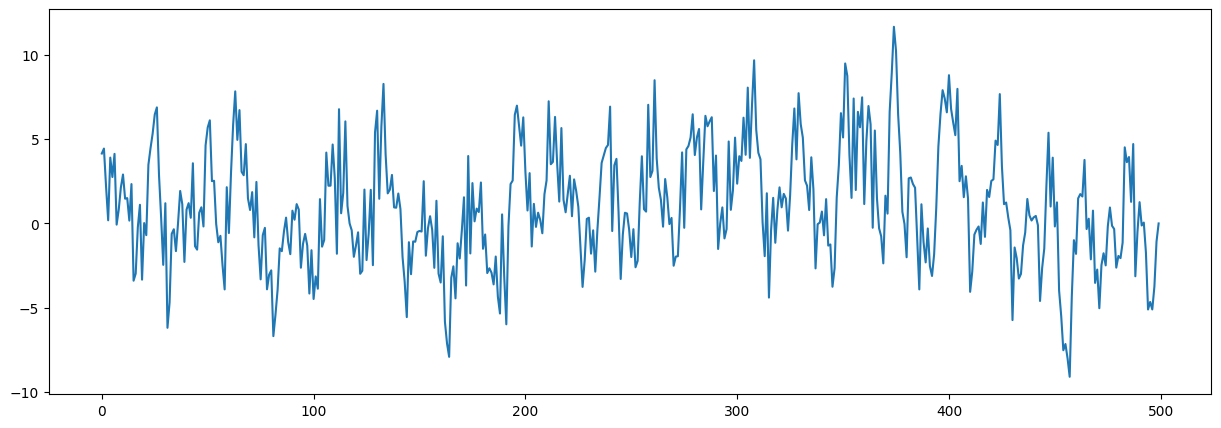

In [ ]:
dataloader = Util.read_single_data("B0101T.gdf", n_workers=0, bsz=4, item_length=500)
for item in dataloader:
    inputs, targets = item
    print(inputs.shape)
    print(targets.shape)
    inputs = inputs[0].T[0]
    targets = targets[0]
    plt.figure(figsize=(15,5))
    plt.plot(inputs)
    break

In [ ]:
data, metadata, events, channels = read_gdf("B0101T.gdf")
sample_data, train_label = prepare_data(data, metadata, events, channels)

1081
5000
Eye blinks


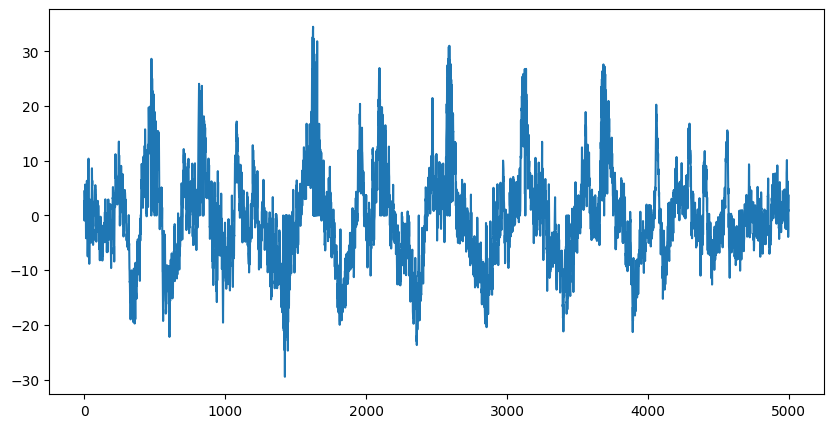

In [ ]:
event_data,event_id,event_description = get_data(
    event_it=3,
    channel=0,
    events=events,
    data=data.T,
    metadata=metadata
)
print(event_id)
print(len(event_data))
print(event_description)
plt.figure(figsize=(10,5))
plt.plot(event_data)

# Test thử mô hình

Dữ liệu được pad thêm 0 để đủ dộ dài, chỉ thử mô hình đơn giản xem chạy được chưa thôi ( từ GPT )

In [ ]:
data, metadata, events, channels = read_gdf("B0101T.gdf")

In [ ]:
sample_data, train_label = prepare_data(data, metadata, events, channels)

In [ ]:
sample_data = np.nan_to_num(sample_data, nan=0, posinf=0, neginf=0)
csp = CSP(n_components=6, reg=None, log=True, norm_trace=False)
lda = LinearDiscriminantAnalysis()
data_csp = csp.fit_transform(sample_data, train_label)
data_csp = np.nan_to_num(data_csp, nan=0, posinf=0, neginf=0)

Computing rank from data with rank=None
    Using tolerance 52 (2.2e-16 eps * 6 dim * 3.9e+16  max singular value)
    Estimated rank (data): 6
    data: rank 6 computed from 6 data channels with 0 projectors
Reducing data rank from 6 -> 6
Estimating class=276 covariance using EMPIRICAL
Done.
Estimating class=277 covariance using EMPIRICAL
Done.
Estimating class=768 covariance using EMPIRICAL
Done.
Estimating class=769 covariance using EMPIRICAL
Done.
Estimating class=770 covariance using EMPIRICAL
Done.
Estimating class=1023 covariance using EMPIRICAL
Done.
Estimating class=1077 covariance using EMPIRICAL
Done.
Estimating class=1078 covariance using EMPIRICAL
Done.
Estimating class=1079 covariance using EMPIRICAL
Done.
Estimating class=1081 covariance using EMPIRICAL
Done.
Estimating class=32766 covariance using EMPIRICAL
Done.


c:\Users\Anh\.conda\envs\data\Lib\site-packages\mne\decoding\csp.py:245: RuntimeWarning: divide by zero encountered in log
  X = np.log(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_csp, train_label, test_size=0.2, random_state=39)
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
y_pred = lda.predict(X_test)
acurracy = accuracy_score(y_test, y_pred)
print(acurracy)

0.5818181818181818


# Xem một số thông số về dữ liệu

In [ ]:
for key in metadata:
    print(key, ":" , metadata[key])
print(sample_data.shape)
print(events[7]) 
print(channels[0])

TYPE : GDF
VERSION : 1.99
Filename : B0101T.gdf
NumberOfChannels : 6
NumberOfRecord : 604803
SamplesPerRecored : 1
NumberOfSamples : 604803
Samplingrate : 250.0
StartOfRecording : 2005-10-25 09:35:11.149985
TimezoneMinutesEastOfUTC : 0
NumberOfSweeps : 8
NumberOfGroupsOrUserSpecifiedEvents : 0
Patient : {'Id': 'B01', 'Age': 20, 'Gender': 'Female'}
(271, 6, 16250)
{'TYP': '0x7ffe', 'POS': 209.004, 'DUR': 0.0, 'Description': 'start of a new segment (after a break)'}
{'ChannelNumber': 1, 'Label': 'EEG:C3          ', 'Samplingrate': 250.0, 'Transducer': '                                                                                ', 'PhysicalMaximum': 99.9985, 'PhysicalMinimum': -99.9985, 'DigitalMaximum': 32767.0, 'DigitalMinimum': -32767.0, 'scaling': 0.0030518, 'offset': 0, 'Filter': {'Lowpass': 0.5, 'Highpass': 100}, 'Impedance': 2147480000.0, 'PhysicalUnit': 'uV'}


1081
5000
Eye blinks


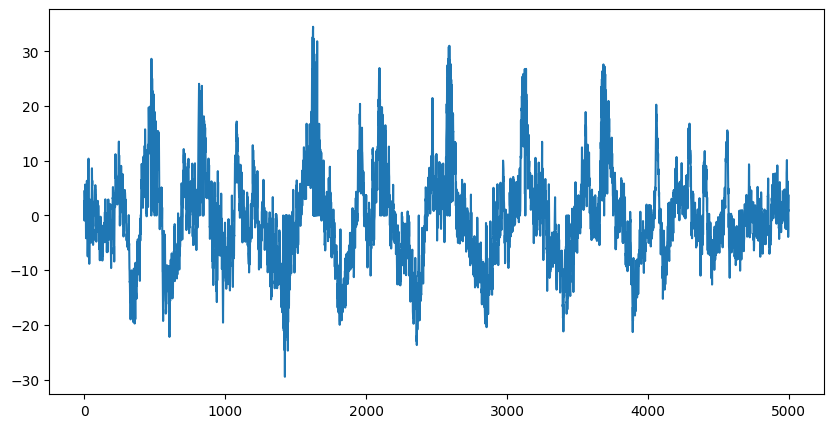

In [ ]:
event_data,event_id,event_description = get_data(
    event_it=3,
    channel=0,
    events=events,
    data=data.T,
    metadata=metadata
)
print(event_id)
print(len(event_data))
print(event_description)
plt.figure(figsize=(10,5))
plt.plot(event_data)